In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

# Algoritmos PCA
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

# Modelo de regresion logistica
from sklearn.linear_model import LogisticRegression

# Preprosesamiento
from sklearn.preprocessing import StandardScaler

# Dicision del set de entrenamiento entre trai/test/validation
from sklearn.model_selection import train_test_split


In [2]:
df_heart = pd.read_csv("./data/heart.csv")

df_heart.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


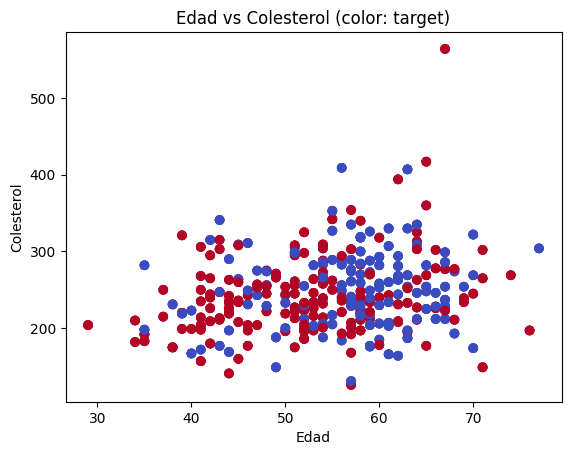

In [3]:
# Suponiendo que ya tienes df_heart cargado
plt.scatter(df_heart['age'], df_heart['chol'], c=df_heart['target'], cmap='coolwarm')
plt.xlabel('Edad')
plt.ylabel('Colesterol')
plt.title('Edad vs Colesterol (color: target)')
plt.show()

In [7]:
df_features = df_heart.drop(["target"], axis=1)
df_target = df_heart['target']

df_features

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [8]:
df_features = StandardScaler().fit_transform(df_features)

df_features

array([[-0.26843658,  0.66150409, -0.91575542, ...,  0.99543334,
         1.20922066,  1.08985168],
       [-0.15815703,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       [ 1.71659547,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       ...,
       [-0.81983438,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459, -0.52212231],
       [-0.4889957 , -1.51170646, -0.91575542, ...,  0.99543334,
        -0.73197147, -0.52212231],
       [-0.04787747,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459,  1.08985168]], shape=(1025, 13))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.3)

In [15]:
# By default : n_components = min(n_muestras, n_features)
pca = PCA(n_components=3)
pca.fit(X_train)


,n_components,3
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [ ]:
ipca = IncrementalPCA(n_components=3, batch_size=10)
ipca.fit(X_train)                                                             

,n_components,3
,whiten,False
,copy,True
,batch_size,10


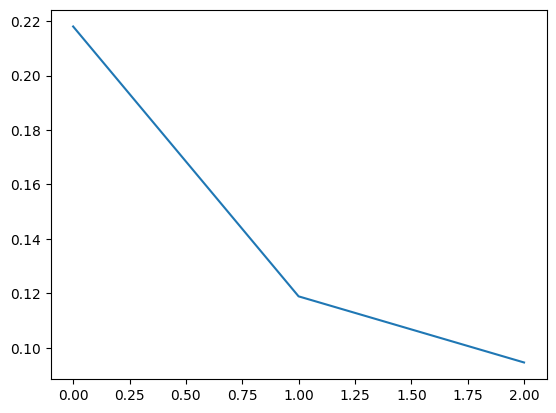

In [17]:
plt.plot(range(len(pca.explained_variance_)), pca.explained_variance_ratio_)
plt.show()

In [24]:
logistic = LogisticRegression(solver='lbfgs')

In [25]:
df_train = pca.transform(X_train)
df_test = pca.transform(X_test)

logistic.fit(df_train, y_train)
print("SCORE PCA: ", logistic.score(df_test, y_test))

SCORE PCA:  0.775974025974026


In [26]:
df_train = ipca.transform(X_train)
df_test = ipca.transform(X_test)

logistic.fit(df_train, y_train)
print("SCORE IPCA: ", logistic.score(df_test, y_test))

SCORE IPCA:  0.7694805194805194
